In [56]:
$$\large Example \, text \, in \, Ipython$$

* Item 1
* Item 2
    * Subitem a
        1. Otro
        2. Otro mas
    * Subitem b
        - Otro
        + Otro mas
* Item 3

Este es un texto comun.

*Este es un texto en cursiva*

**Este es un texto en negrita**

[Este es un link hacia google](http://google.com)

SyntaxError: invalid syntax (<ipython-input-56-185c0c777aee>, line 1)

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt



##  Leo el archivo events y lo referencio como dataframe

In [2]:
trocafone = pd.read_csv('/home/osboxes/fiuba-trocafone-tp1-final-set/events.csv',low_memory = False)

In [7]:
#Primer vistazo del archivo
trocafone.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#Miro las distintas categorias 
trocafone.count()

timestamp                   1011288
event                       1011288
person                      1011288
url                           82756
sku                          563838
model                        564284
condition                    563836
storage                      563836
color                        563836
skus                         221699
search_term                   48967
staticpage                     3598
campaign_source               82796
search_engine                 50957
channel                       87378
new_vs_returning              87378
city                          87378
region                        87378
country                       87378
device_type                   87378
screen_resolution             87378
operating_system_version      87378
browser_version               87378
dtype: int64

In [9]:
#Miro la variedad de tipos de datos presentes en el archivo
trocafone.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

### Se puede ver como pandas setea todo en object inicialmente

In [10]:
#Filtro la variedad de eventos
eventos = trocafone['event'].value_counts()

In [11]:
#Cantidad por evento
eventos

viewed product       528931
brand listing         98635
visited site          87378
ad campaign hit       82827
generic listing       67534
searched products     56073
search engine hit     50957
checkout              33735
staticpage             3598
conversion             1172
lead                    448
Name: event, dtype: int64

In [12]:
#Miro el tipo de dato que es eventos
type(eventos)

pandas.core.series.Series

Text(0,0.5,'Cantidad por evento')

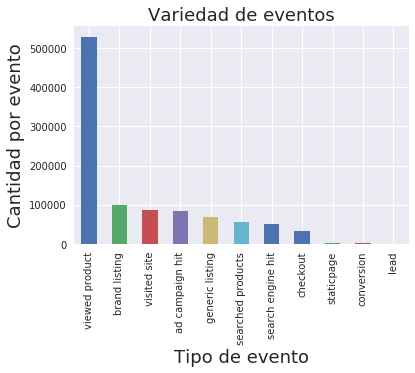

In [13]:
#Hago un pequenio grafico de barras de la cantidad por variedad de eventos 
eventos.plot(kind='bar')
plt.title('Variedad de eventos', fontsize = 18)
plt.xlabel('Tipo de evento', fontsize = 18)
plt.ylabel('Cantidad por evento', fontsize = 18)


In [14]:
eventsAndCountries = trocafone[['event','country']].dropna()

In [15]:
eventosXPais = eventsAndCountries[(eventsAndCountries['country'] != 'Unknown') & (eventsAndCountries['event'])]

In [16]:
df2 = (eventosXPais.groupby('country')['event'].agg({'event' : 'count'}))
df2


/home/osboxes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,event
country,
Algeria,1
Angola,2
Argentina,94
Bangladesh,4
Belize,1
Brazil,84308
Canada,35
Cape Verde,1
China,1


In [17]:
df3 = df2.reset_index()

df3["event_log"] = np.log(df3["event"]+1)


## Cantidad de eventos por pais

Text(0,0.5,'Paises')

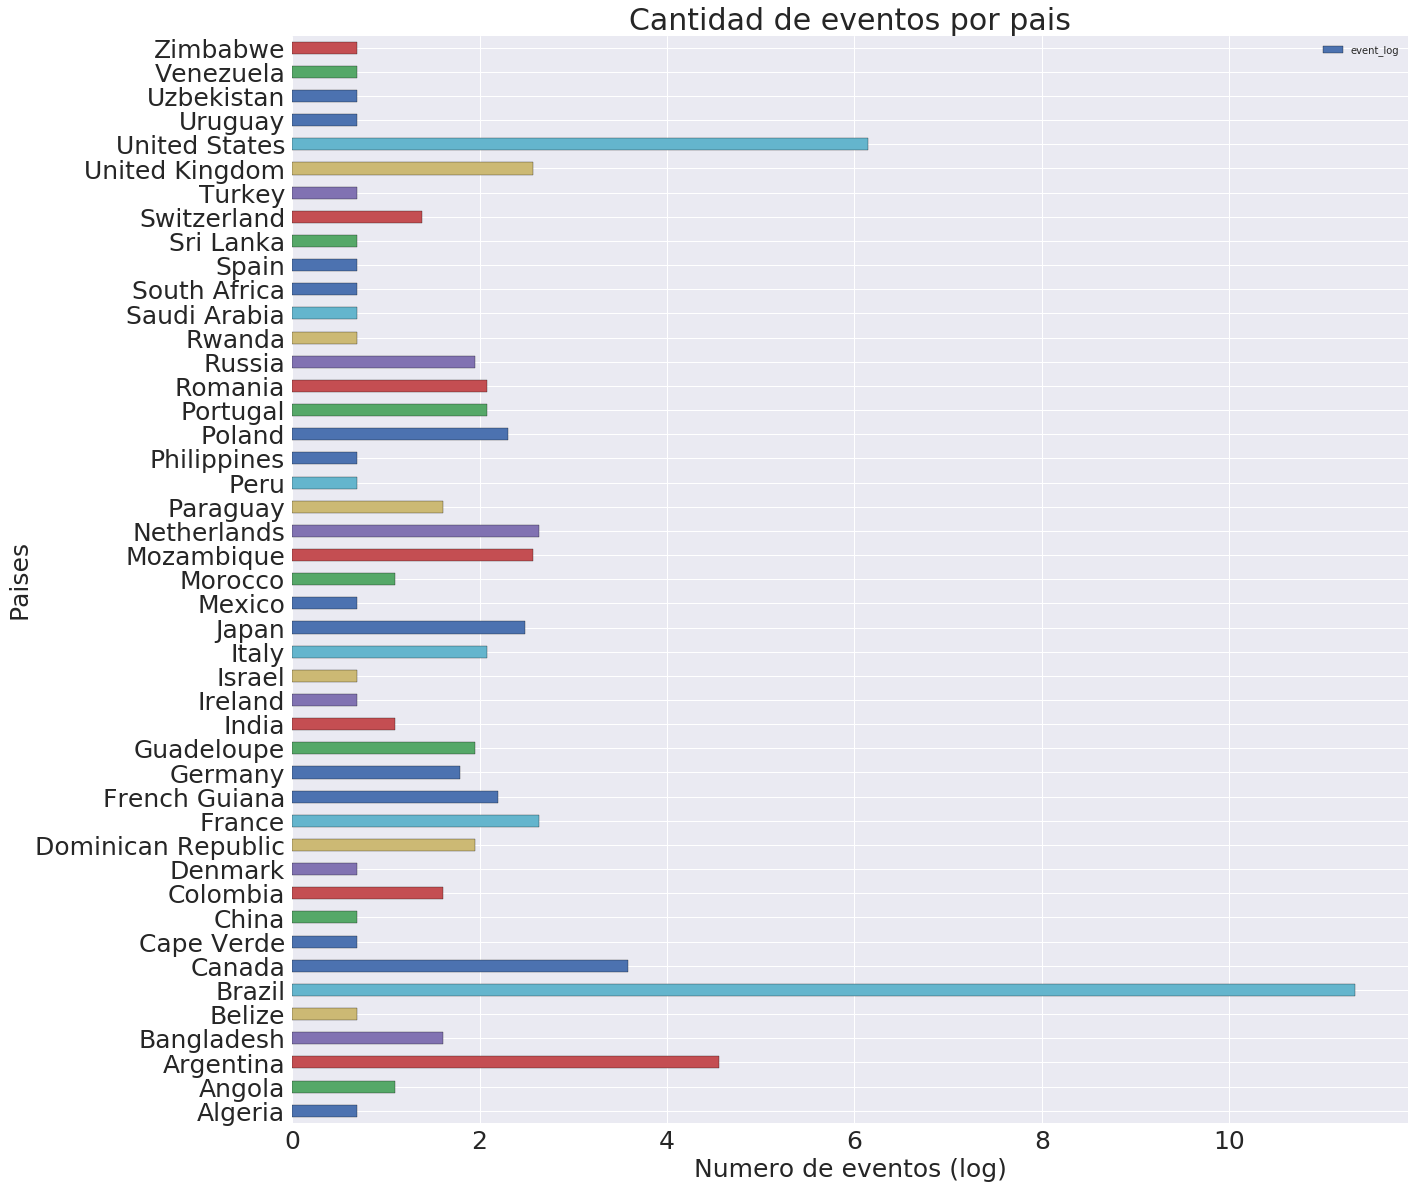

In [18]:

# Ploteo la cantidad de eventos por pais
g = df3.plot.barh(x='country', y='event_log',fontsize = 25, figsize=(20, 20), edgecolor='k')

plt.title('Cantidad de eventos por pais', fontsize = 30)
plt.xlabel('Numero de eventos (log)', fontsize = 25)
plt.ylabel('Paises', fontsize = 25)


## 10 dispositivos con mayor cantidad de conversiones

In [60]:
#Voy a mirar los 10 modelos de telefonos con mas cantidad de conversiones

/home/osboxes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


Text(0.5,0,'Conversiones')

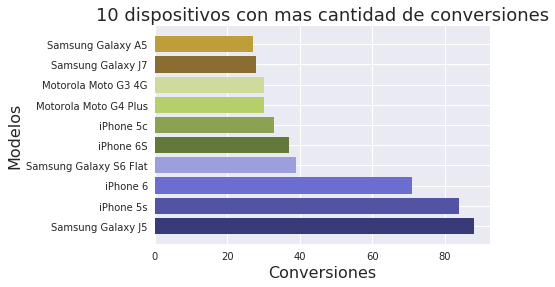

In [174]:
#Me quedo con las columnas relevantes
models = trocafone[(trocafone['event'] == 'conversion') & (trocafone['model'] != 'NaN')]

#Cuento cantidad de conversiones por modelo
conversionesForModel = models.groupby('model')['event'].agg({'event' : 'count'})

#Me quedo con los 10 de mayor cantidad
conv = conversionesForModel.sort_values(by='event', ascending=False).head(10).reset_index()

#convierto a dataframe
df = pd.DataFrame(data=conv)

# Ploteo los 10 modelos de telefonos con mas cantidad de conversiones
#g = df.plot.barh(x='model', y='event',fontsize = 18, figsize=(16, 12), edgecolor='k')

# Otra manera de plot
plt.barh(range(len(df)), df["event"], color =plt.cm.tab20b(np.arange(len(df['model']))))
ind = np.arange(len(df['model'])) 
plt.yticks(ind, (df['model']))

plt.title('10 dispositivos con mas cantidad de conversiones', fontsize = 18)
plt.ylabel('Modelos', fontsize = 16)
plt.xlabel('Conversiones', fontsize = 16)

## Conversiones en funcion del almacenamiento de los dispositivos

In [22]:
almac = trocafone[(trocafone['event'] == 'conversion') & (trocafone['storage'] != 'NaN')]

In [54]:
almacenamiento = almac.groupby('storage')['event'].agg({'event' : 'count'}).reset_index().sort_values("event")
almacenamiento

/home/osboxes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


,storage,event
2,256GB,1
5,512MB,3
4,4GB,17
0,128GB,27
6,64GB,102
7,8GB,205
3,32GB,265
1,16GB,552


Text(0.5,6.8,'Capacidad')

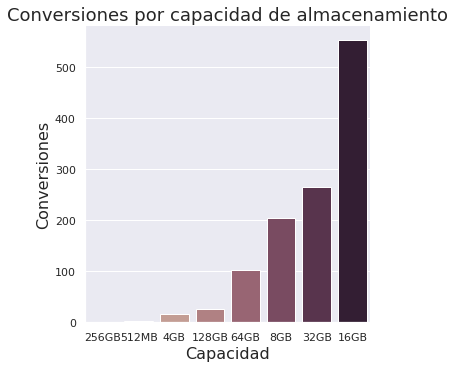

In [55]:
sns.catplot(x="storage", y="event", kind = "bar", palette="ch:.25", data = almacenamiento)
plt.title('Conversiones por capacidad de almacenamiento', fontsize = 18)
plt.ylabel('Conversiones', fontsize = 16)
plt.xlabel('Capacidad', fontsize = 16)


## Conversiones en funcion del sistema operativo utilizado


In [78]:
tr = trocafone[(trocafone['event'] == 'conversion' ) & (trocafone['timestamp'] != 'NaN')]
soAndConversions = tr.groupby('timestamp')['event'].agg({'event' : 'count'})

soAndConversions

/home/osboxes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version
  


,event
timestamp,
2018-01-04 15:01:56,1
2018-01-04 15:08:08,1
2018-01-05 13:50:51,1
2018-01-05 17:27:03,1
2018-01-05 17:40:10,1
2018-01-07 22:50:56,1
2018-01-07 23:09:17,1
2018-01-08 03:41:34,1
2018-01-08 20:40:40,1
